## Performing learning-to-rank with default setting


### Declare the evaluation object

In [1]:
from org.archive.ltr_adhoc.eval.l2r import L2REvaluator

# Required input and output directories
data_id = 'MQ2007_Super'
dir_data = '/Users/dryuhaitao/WorkBench/Corpus/LETOR4.0/MQ2007/'
dir_output='/Users/dryuhaitao/WorkBench/output/'

evaluator = L2REvaluator()

data_dict, eval_dict = evaluator.get_default_dicts(data_id=data_id, dir_data=dir_data, dir_output=dir_output)

### Prepare data

In [2]:
train_data, test_data, vali_data = evaluator.load_data(eval_dict=eval_dict, data_dict=data_dict, fold_k=1)

Fold- 1


### Configuration of the neural scoring function

In [3]:
sf_para_dict = evaluator.get_default_sf_para_dict(data_dict=data_dict, eval_dict=eval_dict)

### The specified model with default parameters


In [4]:
model_id = 'RankNet'
model_para_dict = evaluator.get_default_para_dict(model_id=model_id)
# required basic check before loading the ranker
evaluator.setup_eval(data_dict=data_dict, eval_dict=eval_dict, sf_para_dict=sf_para_dict, model_para_dict=model_para_dict)

ranker   = evaluator.load_ranker(data_dict=data_dict, eval_dict=eval_dict, model_para_dict=model_para_dict, sf_para_dict=sf_para_dict)

### Plot functionality

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def show_var(list_vals, lbl=None):
    X = np.arange(start=1, stop=len(list_vals)+1).tolist()
    if lbl is not None:
        plt.plot(X, list_vals, label=lbl)
    else:
        plt.plot(X, list_vals)


### Train the learning-to-rank model and plot the performance

Text(0.5, 1.0, 'RankNet')

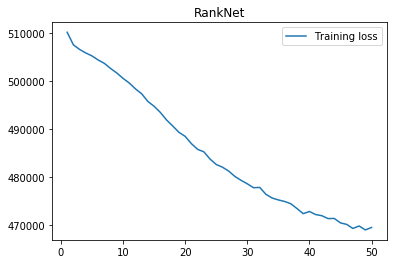

In [6]:
ranknet_losses, ranknet_train_ndcgs, ranknet_test_ndcgs = evaluator.basic_train(ranker=ranker, eval_dict=eval_dict, train_data=train_data, test_data=test_data)

show_var(ranknet_losses, lbl='Training loss') # show the variation of loss
plt.legend()
plt.title('RankNet')
